<a href="https://colab.research.google.com/github/MohamadMahdiDarvishi/Audio-ML/blob/main/Notebooks/Audio_ML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Music genre classification : implementing a Convoloutional Neural Network (CNN)

**Introduction**

Since the 1950s, AI researchers have sought to develop systems that can understand visual data. This effort gave birth to the field of Computer Vision. In 2012, a significant breakthrough occurred when researchers from the University of Toronto developed AlexNet, an AI model that significantly outperformed previous image recognition algorithms. AlexNet, created by Alex Krizhevsky, won the 2012 ImageNet contest with 85% accuracy, far surpassing the runner-up’s 74%. This success was driven by CNNs, a type of neural network that mimics human vision.

📚 **Refrences**

[This website  is great for learning how does kernels and max pooling and paddings works](https://www.analyticsvidhya.com/blog/2021/05/convolutional-neural-networks-cnn/)

Actully, this website visionally describes all of functions that happens in convoloutional layers .



## 0 . Prerequirities

In [ ]:
# Imports
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

In [ ]:
# Downloading json file to our local colab notebook
from google.colab import drive
drive.mount('/content/drive')
%cp '/content/drive/My Drive/data_10.json' '/content/'

Mounted at /content/drive


In [ ]:
# path to json file that stores MFCCs and genre labels for each processed segment
DATASET_PATH = "/content/dataset/Data"
JSON_PATH = "/content/data_10.json"

🔑 **Required functions for loading data and tracking model results**

In [ ]:
def load_data(json_path = JSON_PATH) :
  """
  Loading training data from json file

  :param data_path (str) : Path to json file containing data
  :return X (ndarray) : Inputs
  :return y (ndarray) : Targets

  """
  with open(json_path , "r") as fp :
    data = json.load(fp)

  X = np.array(data["mfcc"])
  y = np.array(data["lables"])

  # Data successfully loaded
  return X , y

def plot_history(history) :
  """
  Plots accuracy/loss for training/validation set as a function of the epochs

  :param
  """
  # plotting Accuuracy for train and test
  plt.subplot(2,2,1)
  plt.plot(history.history["Accuracy"] , label = "train_acc")
  plt.plot(history.history["val_Accuracy"] , label = "test_acc")
  plt.legend()
  plt.title("Accuracy")

  # plotting Accuracy for train and  test
  plt.subplot(2,2,2)
  plt.plot(history.history["loss"] , label = "train error")
  plt.plot(history.history["val_loss"] , label = "test error")
  plt.legend()
  plt.title("Error")

⚡ **New function for preparing dataset**

In [ ]:
def prepare_dataset(test_size , validation_size) :

  """
    Loads data and splits it into train, validation and test sets.

    :param test_size (float) : Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float) : Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray) : Input targeting set
    :return X_validation (ndarray) : Input validation set
    :return X_test (ndarray) : Input test set
    :return y_train (ndarray) : Target training set
    :return y_validation (ndarray) : Target validation set
    :return y_test (ndarray) : Target test set

  """
  # Dividing the data to 3 parts train , validation , test
  X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = test_size)
  X_train , X_validation , y_train , y_validation = train_test_split(X_train , y_train , test_size = validation_size)

  # adding new dimension to input data not targets
  X_train = X_train[... , np.newaxis]
  X_validation = X_validation[... , np.newaxis]
  X_test = X_test[... , np.newaxis]

  # Return
  return X_train , X_validation , X_test , y_train , y_validation , y_test

## 1 . Build CNN

In [ ]:
def build_model(input_shape) :
  """
    Generating CNN model

    :param input_shape : input shape of dataset for  model

    :return model : CNN model
  """

  model = tf.keras.Sequential([
      # Input layer
      # tf.keras.layers.Input(shape = input_shape) ,

      # 1st Convoloutional layer
      tf.keras.layers.Conv2D(32 , (3,3) , activation = "relu" , input_shape = input_shape) ,
      tf.keras.layers.MaxPooling2D((2,2) , strides = (1,1) , padding = "same") ,
      tf.keras.layers.BatchNormalization() ,

      # 2nd Convoloutional layer
      tf.keras.layers.Conv2D(32 , (3,3) , activation = "relu") ,
      tf.keras.layers.MaxPooling2D((2,2) , strides = (1,1) , padding = "same") ,
      tf.keras.layers.MaxPooling2D() ,

      # 3rd Convoloutional layer
      tf.keras.layers.Conv2D(32 , (2,2) , activation = "relu") ,
      tf.keras.layers.MaxPooling2D((2,2) , strides = (1,1) , padding = "same") ,
      tf.keras.layers.MaxPooling2D() ,

      # Flatten layer
      tf.keras.layers.Flatten() ,

      # 1st Dense layers
      tf.keras.layers.Dense(64 , activation = "relu") ,

      # Solving Overfitting
      tf.keras.layers.Dropout(0.3) ,

      # 2nd Dense layer
      tf.keras.layers.Dense(10 , activation = "softmax")
  ])

  return model

🔎 **Building a Predicting model**


In [ ]:
def predict(model , X , y) :
  """
    predicting on a sample

    :param X : a sample music
    :param y (int) : Traget (lables)
    :param model : trained model for classification

    :return prediction (int) : predicted lables
  """
  # adding a  dimension to input data
  # X = X[np.newaxis , ...]

  # making prediction
  prediction = model.predict(X)

  # geting the index with the most value
  prediction_index = np.argmax(prediction , axis = 1)

  # printing out the results
  print(f"target : {y}  | Prediction : {prediction_index}")

  return prediction_index

📖 **Food for  thought**

Adding a new dimension to our matrices


```
# code snippet

A = ['A' , 'B' , 'C']
A = [np.newaxis , ...] # A would be  [['A' , 'B' , 'C']]

B = ['A' , 'B' , 'C']
B = [... , np.newaxis] # B would be [['A'] , ['B'] , ['C']]
```



In [ ]:
# TODO : loading data
# TODO : Creating Xsssss
# TODO : finding input_shape
# TODO : creating a model
# TODO : Compile the model
# TODO : train the model
# TODO : plotting the history
# TODO : evaluating model
# TODO : picking a 10 samples from test and making prediction

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 45s 227ms/step - Accuracy: 0.2741 - loss: 2.0413 - val_Accuracy: 0.4619 - val_loss: 1.5354
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 43s 229ms/step - Accuracy: 0.4153 - loss: 1.6093 - val_Accuracy: 0.5134 - val_loss: 1.3700
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 81s 222ms/step - Accuracy: 0.5188 - loss: 1.3620 - val_Accuracy: 0.5648 - val_loss: 1.1928
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 49s 260ms/step - Accuracy: 0.5500 - loss: 1.2623 - val_Accuracy: 0.6028 - val_loss: 1.1423
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 42s 226ms/step - Accuracy: 0.5895 - loss: 1.1407 - val_Accuracy: 0.6101 - val_loss: 1.0705
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 81s 221ms/step - Accuracy: 0.6143 - loss: 1.1000 - val_Accuracy: 0.6322 - val_loss: 1.0796
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 83s 226ms/step - Accuracy: 0.6365 - loss: 1.0074 - val_Accuracy: 0.6615 - val_loss: 0.9992
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 42s 222ms/step - Accuracy: 0.6711 - loss: 0.9500 - val

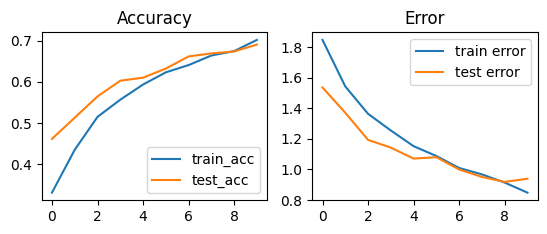

In [ ]:
if __name__ == "__main__" :
  # Loading the whole of data
  X , y = load_data(json_path = JSON_PATH)

  # Extracting Xsssss
  X_train , X_validation , X_test , y_train , y_validation , y_test = prepare_dataset(test_size = 0.25 , validation_size = 0.2)

  # finding input shape
  # input_shape = np.asarray([1] + list(X_train.shape[1:]))
  input_shape = (X_train.shape[1], X_train.shape[2], 1)
  # build model
  model = build_model(input_shape = input_shape)

  # compie model
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) ,
                loss = 'sparse_categorical_crossentropy' ,
                metrics = ["Accuracy"])

  # train model
  history = model.fit(x = X_train ,
                      y = y_train ,
                      epochs = 10 ,
                      validation_data = (X_validation , y_validation) ,
                      batch_size = 32)

  # plotting model history : model accuracy and loss
  plot_history(history)

  # evaluating model
  test_loss , test_acc = model.evaluate(X_test , y_test)
  print(f"evaluated  Results : \n test_loss : {test_loss} | test_acc : {test_acc}")

  # picking samples and making prediction
  X_sample = X_test[:10]
  y_sample = y_test[:10]
  prediction = predict(model = model ,
                       X = X_sample ,
                       y = y_sample)

**Save model**

In [ ]:
# save a model
model.save("/content/model_1.h5")

In [ ]:
# put saved model on the mounted google drive
%cp '/content/model_1.h5' '/content/drive/My Drive/model_1.h5'

📑 **Saving and loading model**

```
## code snippet

# save model
model.save("model_1.h5")

# load model
loaded_model = tf.keras.models.load_model("model_1.h5")

```